# Best Neighborhood to buy a house

"Companies like Google and Tesla are moving operations to Austin. The software giant Oracle has also relocated its headquarter here. As more companies move here, that means more people looking for homes, and the city is also attractive to outside investors. With a steady influx of job creation in the pipeline, the housing market will continue to post strong numbers well into 2021.

Big companies moving here will also play into what happens to the housing market. With historically low mortgage interest rates (below 3%) and an all-time high in corporate relocations, the housing demand is way up and the supply side cannot match up."

This is from a report on Austin's real estate market (https://www.noradarealestate.com/blog/austin-real-estate-market/)With the house price rocketing in Austin, as well as the historically low mortgage rate, more and more people living nearby consider to buy a house in Aunstin as an investment. My husband and I are one of them.

In order to evaluate the neighborhoods in Austin from the above three different aspects, we will need to utilize the data from three resources: 1) Foursquare for the venues in each neighborhoods in Austin; 2) crime rate data of each neighborhood in Austin; 3) house price statistics of each neighborhood in Austin.
1. Venues data from Foursquare 
Using Foursquare API, we can request all the venues in all neighborhoods in Austin. The neighborhoods can be further clustered according to the most popular venue types, which will provide an indicator as to which neighborhood is convenient for specific needs
2. Crime data
Crime data of each neighborhoods in Austin can be found from austintexas.com. The search will be limited to recent one year (from March 1st 2020 to March 1st 2021) and the list will be scraped using beautifulsoup library and key information including address and crime type will be scraped to form a table. The final statistics will be compared with the report from NeighborhoodScout.com.
3. House price data
The average or median house price by neighborhood in Austin will be obtained from the report in Texas Real Estate Research Center (https://www.recenter.tamu.edu/data/housing-activity/#!/activity/MSA/Austin-Round_Rock) and compared with the report in NeighborhoodScout website (https://www.neighborhoodscout.com/tx/austin/real-estate).


## 1. Clustering neighborhoods in Austin using Foursquare API

Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [77]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#import k-means from clustering stage
from sklearn.cluster import KMeans

%pip install folium
import folium!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /Users/hongxudong/opt/anaconda3

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.2               |     pyhd8ed1ab_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1h             |       haf1e3a3_0         1.9 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.6 MB

The following NEW packages w

ModuleNotFoundError: No module named 'folium'

I was trying to get a full list of the neighborhood of Austin and hopefully also their coordinates. But there seems not such clean data in a table format to use. So we also need to Import bs4 and request so that we can scrape information from needed websit.

The websit has a list of neighborhoods in Austin--https://en.wikipedia.org/wiki/List_of_Austin_neighborhoods We can scrape the list and save it into a dataframe, then use geocoder to get their coordinate.

In [6]:
!pip install geopy
!pip install bs4
#!pip install requests
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=a8a150c3cbc54820212f5faca5d836f526081ea3df0bd3952e73d2b855ffd171
  Stored in directory: /Users/hongxudong/Library/Caches/pip/wheels/75/78/21/68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
Successfully built bs4


In [13]:

url='https://en.wikipedia.org/wiki/List_of_Austin_neighborhoods'
data=requests.get(url).text
soup=BeautifulSoup(data,"html5lib")
href_list=soup.find_all(href=True)
href_list

[<link href="/w/load.php?lang=en&amp;modules=ext.cite.styles%7Cext.uls.interlanguage%7Cext.visualEditor.desktopArticleTarget.noscript%7Cext.wikimediaBadges%7Cjquery.makeCollapsible.styles%7Cjquery.tablesorter.styles%7Cskins.vector.styles.legacy%7Cwikibase.client.init&amp;only=styles&amp;skin=vector" rel="stylesheet"/>,
 <link href="/w/load.php?lang=en&amp;modules=site.styles&amp;only=styles&amp;skin=vector" rel="stylesheet"/>,
 <link href="//upload.wikimedia.org" rel="preconnect"/>,
 <link href="//en.m.wikipedia.org/wiki/List_of_Austin_neighborhoods" media="only screen and (max-width: 720px)" rel="alternate"/>,
 <link href="/w/index.php?title=List_of_Austin_neighborhoods&amp;action=edit" rel="alternate" title="Edit this page" type="application/x-wiki"/>,
 <link href="/w/index.php?title=List_of_Austin_neighborhoods&amp;action=edit" rel="edit" title="Edit this page"/>,
 <link href="/static/apple-touch/wikipedia.png" rel="apple-touch-icon"/>,
 <link href="/static/favicon/wikipedia.ico" re

We can see from the list that not only the neighborhood names are scraped. So we need to limit what can be written into our target dataframe. After some examination, we can tell that 'Austin, Texas' ends every neighborhood name, which can be used as the critera. And it works great! Now we have the list of neighborhood names in a dataframe. 


In [147]:
import pandas as pd
neigh_df = pd.DataFrame(columns=["Neighborhood"])

for i,href in enumerate(href_list):
    neigh=href.get('title')
    if (neigh!=None) and (", Austin, Texas" in neigh):        
        neigh_df=neigh_df.append({"Neighborhood":neigh}, ignore_index=True)
    
neigh_df

Neighborhood
0                         Bryker Woods, Austin, Texas
1                              Hancock, Austin, Texas
2                    Pemberton Heights, Austin, Texas
3                             Rosedale, Austin, Texas
4                         Bryker Woods, Austin, Texas
5                          Clarksville, Austin, Texas
6                            Hyde Park, Austin, Texas
7                    Pemberton Heights, Austin, Texas
8                             Rosedale, Austin, Texas
9                            Allandale, Austin, Texas
10  Balcones Woods, Austin, Texas (page does not e...
11  Barrington Oaks, Austin, Texas (page does not ...
12  Battle Bend Springs, Austin, Texas (page does ...
13                           Brentwood, Austin, Texas
14                           Crestview, Austin, Texas
15                             Hancock, Austin, Texas
16      Highland, Austin, Texas (page does not exist)
17                        North Burnet, Austin, Texas
18  North Campus, Austin, Texas (page does not exist)
19   North Lamar, Austin, Texas (page does not exist)
20    North Loop, Austin, Texas (page does not exist)
21                   North Shoal Creek, Austin, Texas
22                          Saint John, Austin, Texas
23                              Wooten, Austin, Texas
24                       Windsor Hills, Austin, Texas
25                        Windsor Park, Austin, Texas
26                        Canyon Creek, Austin, Texas
27  Great Hills/Arboretum, Austin, Texas (page doe...
28                     Northwest Hills, Austin, Texas
29                         Copperfield, Austin, Texas
30  Wells Branch, Austin, Texas (page does not exist)
31                 Central East Austin, Austin, Texas
32                   East Cesar Chavez, Austin, Texas
33  East Congress, Austin, Texas (page does not ex...
34      East End, Austin, Texas (page does not exist)
35       Govalle, Austin, Texas (page does not exist)
36   Gracy Woods, Austin, Texas (page does not exist)
37         Holly, Austin, Texas (page does not exist)
38       Mueller, Austin, Texas (page does not exist)
39                            Far West, Austin, Texas
40                           Tarrytown, Austin, Texas
41  West Congress, Austin, Texas (page does not ex...
42      West End, Austin, Texas (page does not exist)
43  Barton Creek, Austin, Texas (page does not exist)
44                        Barton Hills, Austin, Texas
45                       Bouldin Creek, Austin, Texas
46                              Dawson, Austin, Texas
47                             Galindo, Austin, Texas
48                         South Lamar, Austin, Texas
49                    South River City, Austin, Texas
50             Spyglass-Barton's Bluff, Austin, Texas
51                      Travis Heights, Austin, Texas
52                              Zilker, Austin, Texas
53               East Riverside-Oltorf, Austin, Texas
54                          Montopolis, Austin, Texas
55                        Dove Springs, Austin, Texas
56                         Onion Creek, Austin, Texas
57  South Manchaca, Austin, Texas (page does not e...
58  Southeast Austin, Austin, Texas (page does not...
59                            Oak Hill, Austin, Texas
60  The Ridge at Lantana, Austin, Texas (page does...
61  Shady Hollow, Austin, Texas (page does not exist)
62                            Westgate, Austin, Texas
63                           Allandale, Austin, Texas
64                        Barton Hills, Austin, Texas
65                           Blackland, Austin, Texas
66                       Bouldin Creek, Austin, Texas
67                           Brentwood, Austin, Texas
68                        Bryker Woods, Austin, Texas
69                        Canyon Creek, Austin, Texas
70                         Copperfield, Austin, Texas
71                           Crestview, Austin, Texas
72                              Dawson, Austin, Texas
73                        Dove Springs, Austi

In [148]:
neigh_df['Neighborhood']=neigh_df['Neighborhood'].str.replace(r"\(.*\)","")
neigh_df.drop_duplicates(inplace=True)
len(neigh_df)

64

We can see after deleting the duplicated rows we have 64 neighorhoods in the dataframe.

In [151]:
%pip install geopy # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
    



Note: you may need to restart the kernel to use updated packages.


In [152]:
neigh_df['Latitude']=0
neigh_df['Longitude']=0


for i in neigh_df.index:
          
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(neigh_df.loc[i,'Neighborhood'])
    if location!=None:
        neigh_df.loc[i,'Latitude'] = location.latitude
        neigh_df.loc[i,'Longitude'] = location.longitude
    else:
        print("coord not found for",neigh_df.loc[i,'Neighborhood'] )

coord not found for Spyglass-Barton's Bluff, Austin, Texas
coord not found for The Ridge at Lantana, Austin, Texas 
coord not found for North Burnet–Gateway, Austin, Texas


So there are three neighborhood of which the coordinates cannot be found. We searched for their zip code and try to find their coordinate by zip code--
* Spyglass-Barton's Bluff, Austin, Texas--TX 78746
* The Ridge at Lantana, Austin, Texas --TX 78735
* North Burnet–Gateway, Austin, Texas--TX 78757

In [153]:
zip_dic={"Spyglass-Barton's Bluff, Austin, Texas":"TX 78746","The Ridge at Lantana, Austin, Texas ":"TX 78735","North Burnet–Gateway, Austin, Texas":"TX 78757"}

for neigh,code in zip_dic.items():
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(code)
    for i in neigh_df.index:
        if neigh_df.loc[i,'Neighborhood']==neigh:
            neigh_df.loc[i,'Latitude'] = location.latitude
            neigh_df.loc[i,'Longitude'] = location.longitude
            print(neigh, 'is added with', location.latitude, location.longitude)



Spyglass-Barton's Bluff, Austin, Texas is added with 30.29902986947965 -97.80717039073713
The Ridge at Lantana, Austin, Texas  is added with 30.263938604154617 -97.866737722005
North Burnet–Gateway, Austin, Texas is added with 30.34799566275618 -97.71577467355502


Great! Now we have 64 neighborhood and they all have latitude and longitude ready for further searching! Let's reset the index to have the index reflect the number of items in the table.

In [154]:
neigh_df.reset_index(drop=True,inplace=True)

In [155]:
neigh_df.tail(30)

Neighborhood   Latitude  Longitude
34                 Mueller, Austin, Texas   30.296524 -97.700203
35                 Far West, Austin, Texas  30.351668 -97.748642
36                Tarrytown, Austin, Texas  30.303125 -97.770485
37           West Congress, Austin, Texas   30.215382 -97.772770
38                West End, Austin, Texas   32.780870 -96.805660
39            Barton Creek, Austin, Texas   30.265638 -97.763966
40             Barton Hills, Austin, Texas  30.251571 -97.784106
41            Bouldin Creek, Austin, Texas  30.255667 -97.755481
42                   Dawson, Austin, Texas  30.232926 -97.761418
43                  Galindo, Austin, Texas  30.235578 -97.768515
44              South Lamar, Austin, Texas  30.236389 -97.782647
45         South River City, Austin, Texas  30.249443 -97.745558
46  Spyglass-Barton's Bluff, Austin, Texas  30.299030 -97.807170
47           Travis Heights, Austin, Texas  30.244474 -97.744000
48                   Zilker, Austin, Texas  30.254236 -97.769581
49    East Riverside-Oltorf, Austin, Texas  30.230462 -97.724321
50               Montopolis, Austin, Texas  30.224946 -97.703444
51             Dove Springs, Austin, Texas  30.186549 -97.737399
52              Onion Creek, Austin, Texas  30.168117 -97.744817
53          South Manchaca, Austin, Texas   30.219541 -97.783883
54        Southeast Austin, Austin, Texas   30.202593 -97.737147
55                 Oak Hill, Austin, Texas  30.285220 -97.733893
56    The Ridge at Lantana, Austin, Texas   30.263939 -97.866738
57            Shady Hollow, Austin, Texas   30.154184 -97.854180
58                 Westgate, Austin, Texas  30.227962 -97.800881
59                Blackland, Austin, Texas  30.281491 -97.720924
60            Granada Hills, Austin, Texas  30.393143 -97.742590
61     North Burnet–Gateway, Austin, Texas  30.347996 -97.715775
62             Scenic Brook, Austin, Texas  30.236123 -97.885337
63              West Campus, Austin, Texas  30.290208 -97.747384

Now we are ready to aquire the venue information using Foursquare API!

In [156]:
CLIENT_ID = 'KTH12FDY3PFVT1TVVGICGZ1EAG0VI3EPPDG0BXU1NER0R232' # your Foursquare ID
CLIENT_SECRET = 'FWNXW4CB3EHEQQFUJN0CLRPNUIUIQEWIGCJHSYWQRGG1JNMX' # your Foursquare Secret
ACCESS_TOKEN = 'AFYA3MZXBJ0MAQ5JFQLJ44GEGZAAI0R5COVXFFKEIFYN2O4M' # your FourSquare Access Token

VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KTH12FDY3PFVT1TVVGICGZ1EAG0VI3EPPDG0BXU1NER0R232
CLIENT_SECRET:FWNXW4CB3EHEQQFUJN0CLRPNUIUIQEWIGCJHSYWQRGG1JNMX


In [157]:
# define function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [191]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            30.290208, 
            -97.747384, 
            1000, 
            LIMIT)
            
        # make the GET request
results = requests.get(url).json()["response"]['groups'][0]['items']

In [197]:
results[3]['venue']

{'id': '4a3fd9eef964a520ffa31fe3',
 'name': 'Pluckers Wing Bar',
 'location': {'address': '2222 Rio Grande St Ste D116',
  'crossStreet': '22nd St',
  'lat': 30.2862799,
  'lng': -97.7449912,
  'labeledLatLngs': [{'label': 'display',
    'lat': 30.2862799,
    'lng': -97.7449912},
   {'label': 'entrance', 'lat': 30.286986, 'lng': -97.744873}],
  'distance': 494,
  'postalCode': '78705',
  'cc': 'US',
  'city': 'Austin',
  'state': 'TX',
  'country': 'United States',
  'formattedAddress': ['2222 Rio Grande St Ste D116 (22nd St)',
   'Austin, TX 78705',
   'United States']},
 'categories': [{'id': '4bf58dd8d48988d14c941735',
   'name': 'Wings Joint',
   'pluralName': 'Wings Joints',
   'shortName': 'Wings',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/wings_',
    'suffix': '.png'},
   'primary': True}],
 'delivery': {'id': '1537187',
  'url': 'https://www.grubhub.com/restaurant/pluckers-wing-bar-2222-rio-grande-street-austin/1537187?affiliate=1131&utm_source=foursq

In [158]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [159]:
austin_venues = getNearbyVenues(names=neigh_df['Neighborhood'],
                                   latitudes=neigh_df['Latitude'],
                                   longitudes=neigh_df['Longitude']
                                  )

Bryker Woods, Austin, Texas
Hancock, Austin, Texas
Pemberton Heights, Austin, Texas
Rosedale, Austin, Texas
Clarksville, Austin, Texas
Hyde Park, Austin, Texas
Allandale, Austin, Texas
Balcones Woods, Austin, Texas 
Barrington Oaks, Austin, Texas 
Battle Bend Springs, Austin, Texas 
Brentwood, Austin, Texas
Crestview, Austin, Texas
Highland, Austin, Texas 
North Burnet, Austin, Texas
North Campus, Austin, Texas 
North Lamar, Austin, Texas 
North Loop, Austin, Texas 
North Shoal Creek, Austin, Texas
Saint John, Austin, Texas
Wooten, Austin, Texas
Windsor Hills, Austin, Texas
Windsor Park, Austin, Texas
Canyon Creek, Austin, Texas
Great Hills/Arboretum, Austin, Texas 
Northwest Hills, Austin, Texas
Copperfield, Austin, Texas
Wells Branch, Austin, Texas 
Central East Austin, Austin, Texas
East Cesar Chavez, Austin, Texas
East Congress, Austin, Texas 
East End, Austin, Texas 
Govalle, Austin, Texas 
Gracy Woods, Austin, Texas 
Holly, Austin, Texas 
Mueller, Austin, Texas 
Far West, Austin,

Let's check how many venues we have collected in total.

In [160]:
austin_venues

Neighborhood  Neighborhood Latitude  \
0                Bryker Woods, Austin, Texas              30.305246   
1                Bryker Woods, Austin, Texas              30.305246   
2                Bryker Woods, Austin, Texas              30.305246   
3                Bryker Woods, Austin, Texas              30.305246   
4                Bryker Woods, Austin, Texas              30.305246   
5                Bryker Woods, Austin, Texas              30.305246   
6                Bryker Woods, Austin, Texas              30.305246   
7                Bryker Woods, Austin, Texas              30.305246   
8                Bryker Woods, Austin, Texas              30.305246   
9                Bryker Woods, Austin, Texas              30.305246   
10               Bryker Woods, Austin, Texas              30.305246   
11               Bryker Woods, Austin, Texas              30.305246   
12               Bryker Woods, Austin, Texas              30.305246   
13               Bryker Woods, Austin, Texas              30.305246   
14               Bryker Woods, Austin, Texas              30.305246   
15               Bryker Woods, Austin, Texas              30.305246   
16               Bryker Woods, Austin, Texas              30.305246   
17               Bryker Woods, Austin, Texas              30.305246   
18               Bryker Woods, Austin, Texas              30.305246   
19               Bryker Woods, Austin, Texas              30.305246   
20               Bryker Woods, Austin, Texas              30.305246   
21               Bryker Woods, Austin, Texas              30.305246   
22               Bryker Woods, Austin, Texas              30.305246   
23               Bryker Woods, Austin, Texas              30.305246   
24               Bryker Woods, Austin, Texas              30.305246   
25               Bryker Woods, Austin, Texas              30.305246   
26               Bryker Woods, Austin, Texas              30.305246   
27               Bryker Woods, Austin, Texas              30.305246   
28               Bryker Woods, Austin, Texas              30.305246   
29               Bryker Woods, Austin, Texas              30.305246   
30               Bryker Woods, Austin, Texas              30.305246   
31               Bryker Woods, Austin, Texas              30.305246   
32               Bryker Woods, Austin, Texas              30.305246   
33               Bryker Woods, Austin, Texas              30.305246   
34               Bryker Woods, Austin, Texas              30.305246   
35               Bryker Woods, Austin, Texas              30.305246   
36               Bryker Woods, Austin, Texas              30.305246   
37               Bryker Woods, Austin, Texas              30.305246   
38               Bryker Woods, Austin, Texas              30.305246   
39               Bryker Woods, Austin, Texas              30.305246   
40               Bryker Woods, Austin, Texas              30.305246   
41               Bryker Woods, Austin, Texas              30.305246   
42               Bryker Woods, Austin, Texas              30.305246   
43               Bryker Woods, Austin, Texas              30.305246   
44               Bryker Woods, Austin, Texas              30.305246   
45               Bryker Woods, Austin, Texas              30.305246   
46                    Hancock, Austin, Texas              30.295896   
47                    Hancock, Austin, Texas              30.295896   
48                    Hancock, Austin, Texas              30.295896   
49                    Hancock, Austin, Texas              30.295896   
50                    Hancock, Austin, Texas              30.295896   
51                    Hancock, Austin, Texas              30.295896   
52                    Hancock, Austin, Texas              30.295896   
53                    Hancock, Austin, Texas              30.295896   
54                    Hancock, Austin, Texas              30.295896   
55                    Hancock, Austin, Texas            

In [161]:
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
austin_venues.groupby('Neighborhood').count()

Neighborhood Latitude  \
Neighborhood                                                    
Allandale, Austin, Texas                                   46   
Balcones Woods, Austin, Texas                              38   
Barrington Oaks, Austin, Texas                             41   
Barton Creek, Austin, Texas                               100   
Barton Hills, Austin, Texas                                29   
Battle Bend Springs, Austin, Texas                         33   
Blackland, Austin, Texas                                   65   
Bouldin Creek, Austin, Texas                              100   
Brentwood, Austin, Texas                                   60   
Bryker Woods, Austin, Texas                                46   
Canyon Creek, Austin, Texas                                 7   
Central East Austin, Austin, Texas                         94   
Clarksville, Austin, Texas                                 95   
Copperfield, Austin, Texas                                 13   
Crestview, Austin, Texas                                   44   
Dawson, Austin, Texas                                      61   
Dove Springs, Austin, Texas                                10   
East Cesar Chavez, Austin, Texas                          100   
East Congress, Austin, Texas                               21   
East End, Austin, Texas                                   100   
East Riverside-Oltorf, Austin, Texas                       53   
Far West, Austin, Texas                                    32   
Galindo, Austin, Texas                                     28   
Govalle, Austin, Texas                                     64   
Gracy Woods, Austin, Texas                                 20   
Granada Hills, Austin, Texas                              100   
Great Hills/Arboretum, Austin, Texas                       61   
Hancock, Austin, Texas                                     69   
Highland, Austin, Texas                                    80   
Holly, Austin, Texas                                      100   
Hyde Park, Austin, Texas                                   59   
Montopolis, Austin, Texas                                  14   
Mueller, Austin, Texas                                     52   
North Burnet, Austin, Texas                                78   
North Burnet–Gateway, Austin, Texas                        39   
North Campus, Austin, Texas                                58   
North Lamar, Austin, Texas                                 46   
North Loop, Austin, Texas                                  62   
North Shoal Creek, Austin, Texas                           83   
Northwest Hills, Austin, Texas                             16   
Oak Hill, Austin, Texas                                   100   
Onion Creek, Austin, Texas                                  5   
Pemberton Heights, Austin, Texas                           71   
Rosedale, Austin, Texas                                    85   
Saint John, Austin, Texas                                 100   
Scenic Brook, Austin, Texas                                25   
Shady Hollow, Austin, Texas                                 6   
South Lamar, Austin, Texas                                 75   
South Manchaca, Austin, Texas                              13   
South River City, Austin, Texas                           100   
Southeast Austin, Austin, Texas                             6   
Spyglass-Barton's Bluff, Austin, Texas                      3   
Tarrytown, Austin, Texas                                   20   
The Ridge at Lantana, Austin, Texas                         4   
Travis Heights, Austin, Texas                              76   
Wells Branch, Austin, Texas                                34   
West Campus, Austin, Texas                                100   
West Congress, Austin, Texas                               14   
West End, Austin, Texas                                   100   
Westgate, Austin, Texas                                    39   
Windsor Hi

we can see that there are 11 neighborhoods which have only aquired less than 15 venues. The least number of venues is 3 which is of Spyglass-Barton's Bluff;and The Ridge at Lantana only has 4. Checking the map, we can see that these neighborhoods are far away from Austin city. So let's exclude these 11 neighborhoods from our list.

In [162]:
venue_group=austin_venues.groupby('Neighborhood').count()
#create list of neighborhoods to drop
drop_list=venue_group[venue_group['Venue']<15].index.tolist()
for i in drop_list:
    austin_venues.drop(austin_venues[austin_venues['Neighborhood']==i].index, inplace = True) 

We can also double check if these neighborhoods have been deleted from the list.

In [163]:
for i in drop_list:
    
    print(i in austin_venues.Neighborhood.tolist())

False
False
False
False
False
False
False
False
False
False
False


In [164]:
print('There are {} uniques categories.'.format(len(austin_venues['Venue Category'].unique())))

There are 330 uniques categories.


In [165]:
num_top_venues = 5

for hood in austin_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = austin_grouped[austin_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allandale, Austin, Texas----
                venue  freq
0          Food Truck  0.09
1  Mexican Restaurant  0.06
2                 Spa  0.04
3            Pharmacy  0.04
4   Electronics Store  0.04


----Balcones Woods, Austin, Texas ----
                  venue  freq
0                   Gym  0.10
1     Indian Restaurant  0.08
2        Baseball Field  0.08
3  Gym / Fitness Center  0.05
4                  Park  0.05


----Barrington Oaks, Austin, Texas ----
                venue  freq
0         Pizza Place  0.07
1      Cosmetics Shop  0.05
2       Grocery Store  0.05
3  Chinese Restaurant  0.05
4    Asian Restaurant  0.05


----Barton Creek, Austin, Texas ----
                  venue  freq
0            Food Truck  0.08
1  Gym / Fitness Center  0.06
2           Yoga Studio  0.04
3                  Park  0.04
4                 Trail  0.04


----Barton Hills, Austin, Texas----
                  venue  freq
0            Taco Place  0.10
1          Burger Joint  0.07
2           Yoga Stud

In [166]:
# one hot encoding
austin_onehot = pd.get_dummies(austin_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
austin_onehot['Neighborhood'] = austin_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [austin_onehot.columns[-1]] + list(austin_onehot.columns[:-1])
austin_onehot = austin_onehot[fixed_columns]

austin_onehot.head()

Neighborhood  ATM  Adult Boutique  African Restaurant  \
0  Bryker Woods, Austin, Texas    0               0                   0   
1  Bryker Woods, Austin, Texas    0               0                   0   
2  Bryker Woods, Austin, Texas    0               0                   0   
3  Bryker Woods, Austin, Texas    0               0                   0   
4  Bryker Woods, Austin, Texas    0               0                   0   

   American Restaurant  Antique Shop  Aquarium  Arcade  \
0                    1             0         0       0   
1                    0             0         0       0   
2                    0             0         0       0   
3                    0             0         0       0   
4                    0             0         0       0   

   Argentinian Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0                       0            0           0                    0   
1                       0            0           0                    0   
2                       0            0           0                    0   
3                       0            0           0                    0   
4                       0            0           0                    0   

   Asian Restaurant  Astrologer  Athletics & Sports  Auto Dealership  \
0                 0           0                   0                0   
1                 0           0                   0                0   
2                 0           0                   0                0   
3                 0           0                   0                0   
4                 0           0                   0                0   

   Auto Garage  Auto Workshop  Automotive Shop  BBQ Joint  Bagel Shop  Bakery  \
0            0              0                0          0           0       0   
1            0              0                0          0           0       0   
2            0              0                0          0           0       0   
3            0              0                0          0           0       1   
4            0              0                0          0           0       0   

   Bank  Bar  Baseball Field  Basketball Court  Beach Bar  Bed & Breakfast  \
0     0    0               0                 0          0                0   
1     0    0               0                 0          0                0   
2     0    0               0                 0          0                0   
3     0    0               0                 0          0                0   
4     0    0               0                 0          0                0   

   Beer Bar  Beer Garden  Beer Store  Big Box Store  Bike Rental / Bike Share  \
0         0            0           0              0                         0   
1         0            0           0              0                         0   
2         0            0           0              0                         0   
3         0            0           0              0                         0   
4         0            0           0              0                         0   

   Bike Shop  Bike Trail  Bistro  Board Shop  Boat Launch  Bookstore  \
0          0           0       0           0            0          0   
1          0           0       0           0            0          0   
2          0           0       0           0            0          0   
3          0           0       0           0            0          0   
4          0           0       0           0            0          0   

   Botanical Garden  Boutique  Bowling Alley  Boxing Gym  Breakfast Spot  \
0                 0         0              0           0               0   
1                 0         0              0           0               0   
2                 0         0              0           0               0   
3                 0         0              0           0               0   
4                 0         0              0           0               0   

 

In [167]:
austin_grouped = austin_onehot.groupby('Neighborhood').mean().reset_index()
austin_grouped

Neighborhood       ATM  Adult Boutique  \
0                Allandale, Austin, Texas  0.000000        0.000000   
1          Balcones Woods, Austin, Texas   0.000000        0.000000   
2         Barrington Oaks, Austin, Texas   0.000000        0.000000   
3            Barton Creek, Austin, Texas   0.000000        0.000000   
4             Barton Hills, Austin, Texas  0.000000        0.000000   
5     Battle Bend Springs, Austin, Texas   0.000000        0.000000   
6                Blackland, Austin, Texas  0.000000        0.000000   
7            Bouldin Creek, Austin, Texas  0.000000        0.000000   
8                Brentwood, Austin, Texas  0.000000        0.000000   
9             Bryker Woods, Austin, Texas  0.000000        0.000000   
10     Central East Austin, Austin, Texas  0.000000        0.000000   
11             Clarksville, Austin, Texas  0.000000        0.000000   
12               Crestview, Austin, Texas  0.000000        0.000000   
13                  Dawson, Austin, Texas  0.000000        0.000000   
14       East Cesar Chavez, Austin, Texas  0.000000        0.000000   
15          East Congress, Austin, Texas   0.000000        0.000000   
16               East End, Austin, Texas   0.000000        0.000000   
17   East Riverside-Oltorf, Austin, Texas  0.000000        0.000000   
18                Far West, Austin, Texas  0.000000        0.000000   
19                 Galindo, Austin, Texas  0.000000        0.000000   
20                Govalle, Austin, Texas   0.000000        0.000000   
21            Gracy Woods, Austin, Texas   0.000000        0.000000   
22           Granada Hills, Austin, Texas  0.000000        0.000000   
23  Great Hills/Arboretum, Austin, Texas   0.000000        0.000000   
24                 Hancock, Austin, Texas  0.000000        0.014493   
25               Highland, Austin, Texas   0.000000        0.000000   
26                  Holly, Austin, Texas   0.000000        0.000000   
27               Hyde Park, Austin, Texas  0.000000        0.000000   
28                Mueller, Austin, Texas   0.000000        0.000000   
29            North Burnet, Austin, Texas  0.000000        0.000000   
30    North Burnet–Gateway, Austin, Texas  0.000000        0.000000   
31           North Campus, Austin, Texas   0.000000        0.000000   
32            North Lamar, Austin, Texas   0.000000        0.000000   
33             North Loop, Austin, Texas   0.000000        0.000000   
34       North Shoal Creek, Austin, Texas  0.000000        0.000000   
35         Northwest Hills, Austin, Texas  0.000000        0.000000   
36                Oak Hill, Austin, Texas  0.000000        0.000000   
37       Pemberton Heights, Austin, Texas  0.000000        0.000000   
38                Rosedale, Austin, Texas  0.000000        0.000000   
39              Saint John, Austin, Texas  0.000000        0.000000   
40            Scenic Brook, Austin, Texas  0.000000        0.000000   
41             South Lamar, Austin, Texas  0.000000        0.000000   
42        South River City, Austin, Texas  0.000000        0.000000   
43               Tarrytown, Austin, Texas  0.000000        0.000000   
44          Travis Heights, Austin, Texas  0.000000        0.000000   
45           Wells Branch, Austin, Texas   0.000000        0.000000   
46             West Campus, Austin, Texas  0.000000        0.000000   
47               West End, Austin, Texas   0.000000        0.000000   
48                Westgate, Austin, Texas  0.000000        0.000000   
49           Windsor Hills, Austin, Texas  0.045455        0.000000   
50            Windsor Park, Austin, Texas  0.000000        0.000000   
51                  Wooten, Austin, Texas  0.000000        0.000000   
52                  Zilker, Austin, Texas  0.000000        0.000000   

    African Restaurant  American Restaurant  Antique Shop  Aquarium    Arcade  \
0             0.000000             0.000000      0.021739      0.00  0.000000   
1             0.000000          

In [168]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [169]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = austin_grouped['Neighborhood']

for ind in np.arange(austin_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(austin_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue  \
0         Allandale, Austin, Texas            Food Truck   
1   Balcones Woods, Austin, Texas                    Gym   
2  Barrington Oaks, Austin, Texas      Korean Restaurant   
3     Barton Creek, Austin, Texas             Food Truck   
4      Barton Hills, Austin, Texas            Taco Place   

  2nd Most Common Venue 3rd Most Common Venue   4th Most Common Venue  \
0           Pizza Place                  Park                Pharmacy   
1     Indian Restaurant        Baseball Field                    Park   
2      Asian Restaurant         Grocery Store      Chinese Restaurant   
3  Gym / Fitness Center                  Park                   Trail   
4          Burger Joint           Yoga Studio  Thrift / Vintage Store   

  5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0    Mexican Restaurant     Mobile Phone Shop                   Spa   
1                 Hotel  Gym / Fitness Center                Bakery   
2           Pizza Place    Mexican Restaurant      Ramen Restaurant   
3   American Restaurant           Coffee Shop                   Spa   
4    Tex-Mex Restaurant                   Bar      Tapas Restaurant   

       8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0           Business Service           Supermarket       Storage Facility  
1             Discount Store   Rental Car Location                   Lake  
2  Cajun / Creole Restaurant         Big Box Store   Mongolian Restaurant  
3                    Theater           Yoga Studio         Clothing Store  
4                  Bookstore        Scenic Lookout         Sandwich Place

In [177]:
# set number of clusters
kclusters = 6

austin_grouped_clustering = austin_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(austin_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 0, 2, 5, 5, 2, 3, 5, 2, 2], dtype=int32)

In [178]:
# add clustering labels
del neighborhoods_venues_sorted['Cluster Labels']
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
#delete the 6 neighborhoods from the neigh_df as well
for i in drop_list:
    neigh_df.drop(neigh_df[neigh_df['Neighborhood']==i].index, inplace = True) 


austin_merged = neigh_df

# merge data to add latitude/longitude for each neighborhood
austin_merged = austin_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

austin_merged.head() 

Neighborhood   Latitude  Longitude  Cluster Labels  \
0       Bryker Woods, Austin, Texas  30.305246 -97.754585               2   
1            Hancock, Austin, Texas  30.295896 -97.724768               2   
2  Pemberton Heights, Austin, Texas  30.249730 -97.738826               3   
3           Rosedale, Austin, Texas  30.313390 -97.744898               2   
4        Clarksville, Austin, Texas  30.277680 -97.759807               4   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0        Sandwich Place                  Park   American Restaurant   
1        Sandwich Place                  Park    Mexican Restaurant   
2            Food Truck            Taco Place                  Park   
3           Coffee Shop    Mexican Restaurant        Clothing Store   
4   American Restaurant           Yoga Studio         Grocery Store   

  4th Most Common Venue   5th Most Common Venue 6th Most Common Venue  \
0           Coffee Shop                    Café                   Spa   
1         Grocery Store    Fast Food Restaurant           Coffee Shop   
2     Indian Restaurant       Convenience Store                   Bar   
3    Italian Restaurant                  Bakery        Sandwich Place   
4    Mexican Restaurant  Furniture / Home Store                   Spa   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0              Pharmacy    Italian Restaurant                 Trail   
1           Music Store    Salon / Barbershop  Gym / Fitness Center   
2                  Lake           Pizza Place              Boutique   
3             Gift Shop     Mobile Phone Shop              Pharmacy   
4        Clothing Store             Pet Store                  Park   

          10th Most Common Venue  
0                    Men's Store  
1            American Restaurant  
2  Vegetarian / Vegan Restaurant  
3                     Food Truck  
4                          Trail

## 2. Analyze the clusters and find our target
Let's first show the locations of all the neighborhoods and their cluster labels in map using folium.

In [179]:
# create map30.2672° N, 97.7431° W
map_clusters = folium.Map(location=[30.2672, -97.7431], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(austin_merged['Latitude'], austin_merged['Longitude'], austin_merged['Neighborhood'], austin_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

We can see cluster 3 and 4 are close to city center, while 2 and 5 are dominated and scattered everywhere. Now let's try to analyze the characteristics of these 6 clusters. First we need to narrow the venue catergories.
Let's also mark the few neighborhoods that are close to the river, which will be the good spots! They are Northwest Hills,  Tarrytown, Bryker Woods, West Campus, Oak Hill.

In [187]:
austin_venues.groupby('Venue Category').count().sort_values(by='Venue',ascending=False)

Neighborhood  Neighborhood Latitude  \
Venue Category                                                                  
Mexican Restaurant                                 127                    127   
Coffee Shop                                        123                    123   
Food Truck                                         123                    123   
Park                                                78                     78   
Pizza Place                                         76                     76   
Bar                                                 73                     73   
Sandwich Place                                      68                     68   
Hotel                                               67                     67   
American Restaurant                                 58                     58   
Grocery Store                                       54                     54   
Taco Place                                          51                     51   
Gym / Fitness Center                                50                     50   
Convenience Store                                   45                     45   
Gym                                                 45                     45   
Café                                                41                     41   
Italian Restaurant                                  38                     38   
Burger Joint                                        37                     37   
Cocktail Bar                                        36                     36   
Bakery                                              36                     36   
Restaurant                                          34                     34   
Fast Food Restaurant                                33                     33   
Ice Cream Shop                                      31                     31   
Liquor Store                                        31                     31   
Yoga Studio                                         30                     30   
BBQ Joint                                           30                     30   
Spa                                                 29                     29   
Pharmacy                                            28                     28   
Gift Shop                                           28                     28   
Clothing Store                                      27                     27   
New American Restaurant                             27                     27   
Furniture / Home Store                              26                     26   
Thrift / Vintage Store                              26                     26   
Cosmetics Shop                                      25                     25   
Gas Station                                         25                     25   
Chinese Restaurant                                  25                     25   
Japanese Restaurant                                 24                     24   
Shoe Store                                          24                     24   
Asian Restaurant                                    24                     24   
Vietnamese Restaurant                               24                     24   
Salon / Barbershop                                  23                     23   
Video Store                                         23                     23   
Boutique                                            22                     22   
Pet Store                                           22                     22   
Trail                                               21                     21   
Mobile Phone Shop                                   20                     20   
Music Store                                         20                     20   
Vegetarian / Vegan Restaurant                       20                     20   
Dive Bar                                            19                   

It's interesting to find that there are many mexican restaurants in Austin! And no price that coffee shot and Park are also everywhere.Other than the most popular venus (top 10), I personally care the most if I am close to a bakery, ice cream shop, and also yoga studio and spa. I am also pretty sure they mean the most for people of similar age as me! So the my customized category list would be including Coffee Shop, Park, Bar, Grocery Store, Bakery, Ice Cream Shop, Yoga Studio,Spa. Let's also combine all types of restaurants into one type and add it to our list and see how much the different clusters are dominated by these venues I am most interested in!

In [207]:
res_list=['Neighborhood']
for i in austin_grouped.columns:
    if 'Restaurant' in i:
        res_list.append(i)
        
res_list

['Neighborhood',
 'African Restaurant',
 'American Restaurant',
 'Argentinian Restaurant',
 'Asian Restaurant',
 'Cajun / Creole Restaurant',
 'Cantonese Restaurant',
 'Caribbean Restaurant',
 'Chinese Restaurant',
 'Comfort Food Restaurant',
 'Cuban Restaurant',
 'Ethiopian Restaurant',
 'Falafel Restaurant',
 'Fast Food Restaurant',
 'Filipino Restaurant',
 'French Restaurant',
 'Gluten-free Restaurant',
 'Greek Restaurant',
 'Halal Restaurant',
 'Hawaiian Restaurant',
 'Indian Chinese Restaurant',
 'Indian Restaurant',
 'Italian Restaurant',
 'Japanese Restaurant',
 'Korean BBQ Restaurant',
 'Korean Restaurant',
 'Latin American Restaurant',
 'Mediterranean Restaurant',
 'Mexican Restaurant',
 'Middle Eastern Restaurant',
 'Mongolian Restaurant',
 'Moroccan Restaurant',
 'New American Restaurant',
 'Peruvian Restaurant',
 'Portuguese Restaurant',
 'Ramen Restaurant',
 'Restaurant',
 'Seafood Restaurant',
 'South American Restaurant',
 'South Indian Restaurant',
 'Southern / Soul Foo

Wow we have included a variety of restanrants into the list.

In [219]:

venue_res=austin_grouped[res_list].sum(axis=1)
austin_category_group=austin_grouped.copy()

del austin_category_group['Restaurant']
austin_category_group.insert(0, 'Restaurant', venue_res.tolist())
austin_category_group.insert(0, 'Cluster Labels', kmeans.labels_)



cate_list=['Neighborhood','Cluster Labels','Restaurant','Coffee Shop', 'Park', 'Bar', 'Grocery Store', 'Bakery', 'Ice Cream Shop', 'Yoga Studio','Spa']
austin_category_group=austin_category_group[cate_list]
austin_category_group

Neighborhood  Cluster Labels  Restaurant  \
0                Allandale, Austin, Texas               2    0.108696   
1          Balcones Woods, Austin, Texas                0    0.131579   
2         Barrington Oaks, Austin, Texas                2    0.292683   
3            Barton Creek, Austin, Texas                5    0.140000   
4             Barton Hills, Austin, Texas               5    0.172414   
5     Battle Bend Springs, Austin, Texas                2    0.121212   
6                Blackland, Austin, Texas               3    0.169231   
7            Bouldin Creek, Austin, Texas               5    0.220000   
8                Brentwood, Austin, Texas               2    0.150000   
9             Bryker Woods, Austin, Texas               2    0.130435   
10     Central East Austin, Austin, Texas               3    0.148936   
11             Clarksville, Austin, Texas               4    0.147368   
12               Crestview, Austin, Texas               1    0.181818   
13                  Dawson, Austin, Texas               5    0.180328   
14       East Cesar Chavez, Austin, Texas               3    0.190000   
15          East Congress, Austin, Texas                5    0.095238   
16               East End, Austin, Texas                4    0.260000   
17   East Riverside-Oltorf, Austin, Texas               1    0.283019   
18                Far West, Austin, Texas               2    0.125000   
19                 Galindo, Austin, Texas               5    0.107143   
20                Govalle, Austin, Texas                5    0.203125   
21            Gracy Woods, Austin, Texas                0    0.050000   
22           Granada Hills, Austin, Texas               4    0.200000   
23  Great Hills/Arboretum, Austin, Texas                4    0.278689   
24                 Hancock, Austin, Texas               2    0.202899   
25               Highland, Austin, Texas                2    0.237500   
26                  Holly, Austin, Texas                5    0.270000   
27               Hyde Park, Austin, Texas               5    0.152542   
28                Mueller, Austin, Texas                2    0.115385   
29            North Burnet, Austin, Texas               2    0.205128   
30    North Burnet–Gateway, Austin, Texas               1    0.179487   
31           North Campus, Austin, Texas                4    0.137931   
32            North Lamar, Austin, Texas                1    0.260870   
33             North Loop, Austin, Texas                5    0.112903   
34       North Shoal Creek, Austin, Texas               2    0.216867   
35         Northwest Hills, Austin, Texas               2    0.125000   
36                Oak Hill, Austin, Texas               2    0.160000   
37       Pemberton Heights, Austin, Texas               3    0.126761   
38                Rosedale, Austin, Texas               2    0.152941   
39              Saint John, Austin, Texas               4    0.210000   
40            Scenic Brook, Austin, Texas               4    0.400000   
41             South Lamar, Austin, Texas               5    0.146667   
42        South River City, Austin, Texas               5    0.220000   
43               Tarrytown, Austin, Texas               2    0.100000   
44          Travis Heights, Austin, Texas               5    0.197368   
45           Wells Branch, Austin, Texas                4    0.176471   
46             West Campus, Austin, Texas               2    0.160000   
47               West End, Austin, Texas                4    0.260000   
48                Westgate, Austin, Texas               2    0.153846   
49           Windsor Hills, Austin, Texas               1    0.181818   
50            Windsor Park, Austin, Texas               2    0.222222   
51                  Wooten, Austin, Texas               2    0.200000   
52                  Zilker, Austin, Texas               5    0.140000   

    Coffee Shop      Park       Bar  Grocery Store    Bakery  Ice Cream Shop  \
0     

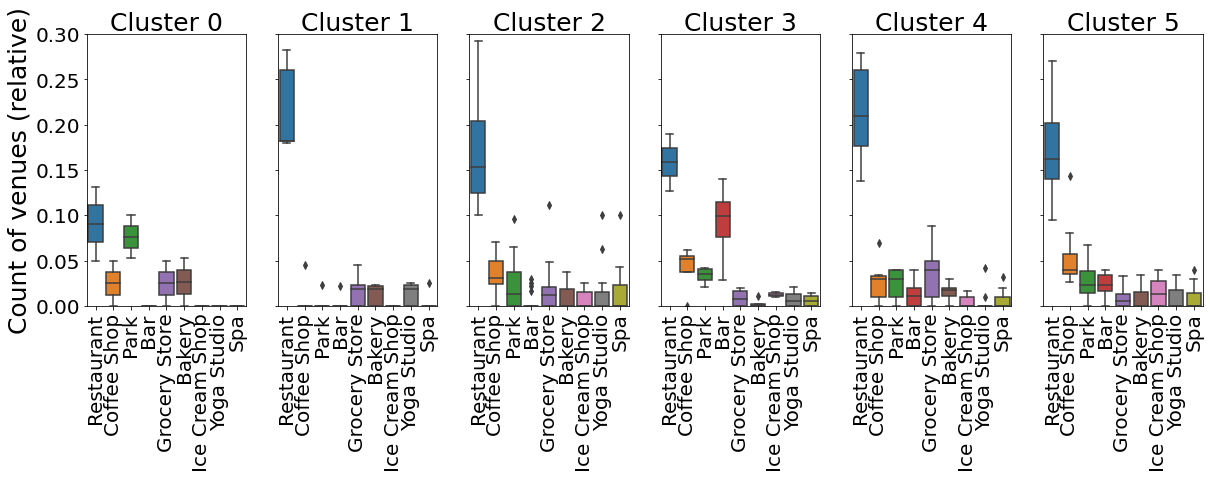

In [224]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
austin_label_df=austin_merged.copy()
fig, axes = plt.subplots(1,kclusters, figsize=(20, 5), sharey=True)

axes[0].set_ylabel('Count of venues (relative)', fontsize=25)
#plt.set_xlabel('Venue category', fontsize='x-large')

for k in range(kclusters):
    #Set same y axis limits
    axes[k].set_ylim(0,0.3)
    axes[k].xaxis.set_label_position('top')
    axes[k].set_xlabel('Cluster ' + str(k), fontsize=25)
    axes[k].tick_params(labelsize=20)
    plt.sca(axes[k])
    plt.xticks(rotation='vertical')
    sns.boxplot(data = austin_category_group[austin_category_group['Cluster Labels'] == k].drop('Cluster Labels',1), ax=axes[k])

plt.show()

Since all these categories mean a lot to us so we can easily get rid of the clusters of which certain category is missing. So cluster 0 and 1, which miss quite a few, cluster 3, which don't have many bakery while is populated by bars, are no longer interesting to us. Cluster 4 lacks yoga studio, which certainly decreases its attractiveness as well. What is left now would be cluster 2 and 5. Checking back in the map, they are scattered around the city while centered around the city center. We still have a lot to choose from! (We don't like to hang out in bars very much, and have the impression that too many bars many to some extent indicate unsafety.But we know many young people like to go to bars after work, so I decide to include cluster 5 for your interest as well.)

In [227]:
austin_merged.head()

Neighborhood   Latitude  Longitude  Cluster Labels  \
0       Bryker Woods, Austin, Texas  30.305246 -97.754585               2   
1            Hancock, Austin, Texas  30.295896 -97.724768               2   
2  Pemberton Heights, Austin, Texas  30.249730 -97.738826               3   
3           Rosedale, Austin, Texas  30.313390 -97.744898               2   
4        Clarksville, Austin, Texas  30.277680 -97.759807               4   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0        Sandwich Place                  Park   American Restaurant   
1        Sandwich Place                  Park    Mexican Restaurant   
2            Food Truck            Taco Place                  Park   
3           Coffee Shop    Mexican Restaurant        Clothing Store   
4   American Restaurant           Yoga Studio         Grocery Store   

  4th Most Common Venue   5th Most Common Venue 6th Most Common Venue  \
0           Coffee Shop                    Café                   Spa   
1         Grocery Store    Fast Food Restaurant           Coffee Shop   
2     Indian Restaurant       Convenience Store                   Bar   
3    Italian Restaurant                  Bakery        Sandwich Place   
4    Mexican Restaurant  Furniture / Home Store                   Spa   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0              Pharmacy    Italian Restaurant                 Trail   
1           Music Store    Salon / Barbershop  Gym / Fitness Center   
2                  Lake           Pizza Place              Boutique   
3             Gift Shop     Mobile Phone Shop              Pharmacy   
4        Clothing Store             Pet Store                  Park   

          10th Most Common Venue  
0                    Men's Store  
1            American Restaurant  
2  Vegetarian / Vegan Restaurant  
3                     Food Truck  
4                          Trail

In [228]:
#list cluster 2 and 5 and their most popular venue types
austin_merged.loc[austin_merged['Cluster Labels'] == 2, austin_merged.columns[[0] + list(range(4, austin_merged.shape[1]))]]

Neighborhood 1st Most Common Venue  \
0           Bryker Woods, Austin, Texas        Sandwich Place   
1                Hancock, Austin, Texas        Sandwich Place   
3               Rosedale, Austin, Texas           Coffee Shop   
6              Allandale, Austin, Texas            Food Truck   
8       Barrington Oaks, Austin, Texas      Korean Restaurant   
9   Battle Bend Springs, Austin, Texas                  Hotel   
10             Brentwood, Austin, Texas           Coffee Shop   
12             Highland, Austin, Texas     Chinese Restaurant   
13          North Burnet, Austin, Texas    Mexican Restaurant   
17     North Shoal Creek, Austin, Texas          Burger Joint   
19                Wooten, Austin, Texas    Mexican Restaurant   
21          Windsor Park, Austin, Texas  Fast Food Restaurant   
24       Northwest Hills, Austin, Texas            Donut Shop   
34              Mueller, Austin, Texas             Food Truck   
35              Far West, Austin, Texas           Pizza Place   
36             Tarrytown, Austin, Texas           Yoga Studio   
55              Oak Hill, Austin, Texas        Sandwich Place   
58              Westgate, Austin, Texas          Dance Studio   
63           West Campus, Austin, Texas            Food Truck   

    2nd Most Common Venue   3rd Most Common Venue   4th Most Common Venue  \
0                    Park     American Restaurant             Coffee Shop   
1                    Park      Mexican Restaurant           Grocery Store   
3      Mexican Restaurant          Clothing Store      Italian Restaurant   
6             Pizza Place                    Park                Pharmacy   
8        Asian Restaurant           Grocery Store      Chinese Restaurant   
9      Mexican Restaurant                     Spa  Furniture / Home Store   
10             Taco Place              Food Truck               Pet Store   
12      Korean Restaurant                  Bakery            Liquor Store   
13             Shoe Store  Furniture / Home Store          Sandwich Place   
17         Sandwich Place     American Restaurant             Coffee Shop   
19  Vietnamese Restaurant             Pizza Place      Chinese Restaurant   
21            Pizza Place           Grocery Store                    Café   
24            Yoga Studio          Hardware Store            Music School   
34                   Park              Playground       Outdoor Sculpture   
35            Gas Station       Convenience Store               Juice Bar   
36                    Spa                    Bank        Toy / Game Store   
55            Coffee Shop         Bubble Tea Shop              Food Truck   
58            Gas Station      Salon / Barbershop              Food Truck   
63         Sandwich Place             Coffee Shop    Fast Food Restaurant   

      5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0                      Café                   Spa              Pharmacy   
1      Fast Food Restaurant           Coffee Shop           Music Store   
3                    Bakery        Sandwich Place             Gift Shop   
6        Mexican Restaurant     Mobile Phone Shop                   Spa   
8               Pizza Place    Mexican Restaurant      Ramen Restaurant   
9                Steakhouse           Gas Station    Tex-Mex Restaurant   
10             Burger Joint           Pizza Place           Gas Station   
12       Mexican Restaurant       Automotive Shop      Toy / Game Store   
13               Food Truck      Asian Restaurant   Sporting Goods Shop   
17       Mexican Restaurant              Pharmacy           Yoga Studio   
19              Coffee Shop        Discount Store            Comic Shop   
21       Mexican Restaurant              Pharmacy           Gas Station   
24  New American Restaurant          Optical Shop             Gift Shop   
34              Coffee Shop            Taco Place            Restaurant   
35        Indian Restaurant         Grocery Store           

It impressed me that Barrington Oaks and Highland both have a lot of assian food. And Westgate has Szechuan restaurants as the 8th most common venue whil West Campus has Bubble Tea shop as the 7th most common. I like them! 

In [229]:
#list cluster 2 and 5 and their most popular venue types
austin_merged.loc[austin_merged['Cluster Labels'] == 5, austin_merged.columns[[0] + list(range(4, austin_merged.shape[1]))]]

Neighborhood 1st Most Common Venue  \
5          Hyde Park, Austin, Texas                  Park   
16       North Loop, Austin, Texas            Coffee Shop   
29    East Congress, Austin, Texas            Coffee Shop   
31          Govalle, Austin, Texas     Mexican Restaurant   
33            Holly, Austin, Texas     Mexican Restaurant   
39     Barton Creek, Austin, Texas             Food Truck   
40      Barton Hills, Austin, Texas            Taco Place   
41     Bouldin Creek, Austin, Texas           Coffee Shop   
42            Dawson, Austin, Texas    Mexican Restaurant   
43           Galindo, Austin, Texas     Convenience Store   
44       South Lamar, Austin, Texas          Burger Joint   
45  South River City, Austin, Texas           Coffee Shop   
47    Travis Heights, Austin, Texas    Mexican Restaurant   
48            Zilker, Austin, Texas           Coffee Shop   

     2nd Most Common Venue                     3rd Most Common Venue  \
5                 Pharmacy                               Coffee Shop   
16             Pizza Place             Vegetarian / Vegan Restaurant   
29            Liquor Store                                Food Truck   
31             Art Gallery                                      Farm   
33              Food Truck                                       Bar   
39    Gym / Fitness Center                                      Park   
40            Burger Joint                               Yoga Studio   
41            Burger Joint                                      Park   
42              Food Truck                         Convenience Store   
43              Food Truck  Residential Building (Apartment / Condo)   
44  Thrift / Vintage Store                         Convenience Store   
45              Food Truck                                  Boutique   
47             Pizza Place                                Food Truck   
48             Pizza Place                        Mexican Restaurant   

     4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
5     Gym / Fitness Center                  Pool    Mexican Restaurant   
16       Convenience Store                 Hotel          Cocktail Bar   
29       Convenience Store            Taco Place        Hardware Store   
31             Coffee Shop               Brewery            Food Truck   
33       Convenience Store           Pizza Place           Coffee Shop   
39                   Trail   American Restaurant           Coffee Shop   
40  Thrift / Vintage Store    Tex-Mex Restaurant                   Bar   
41      Salon / Barbershop            Food Truck        Ice Cream Shop   
42                Dive Bar            Taco Place           Coffee Shop   
43      Mexican Restaurant              Platform                 Trail   
44                     Spa            Taco Place           Coffee Shop   
45      Italian Restaurant                  Park    Mexican Restaurant   
47             Coffee Shop              Boutique    Italian Restaurant   
48                     Bar         Grocery Store        Ice Cream Shop   

      7th Most Common Venue 8th Most Common Venue  9th Most Common Venue  \
5                       Bar              Bus Stop         Ice Cream Shop   
16   Thrift / Vintage Store        Clothing Store  Vietnamese Restaurant   
29     Gym / Fitness Center                   Gym     Mexican Restaurant   
31  New American Restaurant  Gym / Fitness Center          Garden Center   
33                BBQ Joint               Brewery     Italian Restaurant   
39                      Spa               Theater            Yoga Studio   
40         Tapas Restaurant             Bookstore         Scenic Lookout   
41               Restaurant  Gym / Fitness Center    Japanese Restaurant   
42            Grocery Store                   Gym            Yoga Studio   
43               Taco Place                Lawyer           Tennis Court   
44               Food Truck    Italian Restaurant                    Bar   
45 

After checking the common venue lists of the cluster 5, I decide that they are much less attractive to me compared to cluster 2, which have a lot of assian food, sweet shops, as well as parks and yoga studios. So I am going to limit my selection to cluster 2.

## 3. Compare house prices
Let's get the data using beautifulsoup again from http://www.city-data.com/nbmaps/neigh-Austin-Texas.html#N121

In [231]:
url2='http://www.city-data.com/nbmaps/neigh-Austin-Texas.html#N121'
data=requests.get(url2).text
soup=BeautifulSoup(data,"html5lib")
tables=soup.find_all('table')
tables

[<table class="table table-condensed"><tbody><tr><td><a href="/city/Alaska.html">AK</a></td><td><a href="/city/Alabama.html">AL</a></td><td><a href="/city/Arkansas.html">AR</a></td><td><a href="/city/Arizona.html">AZ</a></td><td><a href="/city/California.html">CA</a></td><td><a href="/city/Colorado.html">CO</a></td><td><a href="/city/Connecticut.html">CT</a></td></tr><tr><td><a href="/city/District-of-Columbia.html">DC</a></td><td><a href="/city/Delaware.html">DE</a></td><td><a href="/city/Florida.html">FL</a></td><td><a href="/city/Georgia.html">GA</a></td><td><a href="/city/Hawaii.html">HI</a></td><td><a href="/city/Iowa.html">IA</a></td><td><a href="/city/Idaho.html">ID</a></td></tr><tr><td><a href="/city/Illinois.html">IL</a></td><td><a href="/city/Indiana.html">IN</a></td><td><a href="/city/Kansas.html">KS</a></td><td><a href="/city/Kentucky.html">KY</a></td><td><a href="/city/Louisiana.html">LA</a></td><td><a href="/city/Massachusetts.html">MA</a></td><td><a href="/city/Maryland.

In [242]:
cluster2=austin_merged.loc[austin_merged['Cluster Labels'] == 2, austin_merged.columns[[0] + list(range(4, austin_merged.shape[1]))]]['Neighborhood'].tolist()
cluster2_list=[]
for i in cluster2:
    cluster2_list.append(i.split(',', 1)[0])
    
cluster2_list

['Bryker Woods',
 'Hancock',
 'Rosedale',
 'Allandale',
 'Barrington Oaks',
 'Battle Bend Springs',
 'Brentwood',
 'Highland',
 'North Burnet',
 'North Shoal Creek',
 'Wooten',
 'Windsor Park',
 'Northwest Hills',
 'Mueller',
 'Far West',
 'Tarrytown',
 'Oak Hill',
 'Westgate',
 'West Campus']

Let's try to loop over the tables to see if the information we are looking for can be scraped.

In [246]:
price_data = pd.DataFrame(columns=["Neighborhood", "Median income"])
for neig in cluster2_list:
    
    for i in range(len(tables)):
    
        table=pd.read_html(str(tables[i]), flavor='bs4')
        neighborhood = np.array(table[0])[0][0]
        price = np.array(table[0])[0][1]
        if (neighborhood==neig) and ('$' in price):
            price_data = price_data.append({"Neighborhood":neighborhood, "Median income":price}, ignore_index=True)
       

price_data.tail()

Empty DataFrame
Columns: [Neighborhood, Median income]
Index: []

The scraping loop is not able to collect the desired information. After checking the website in detail, we can see that inside each neighborhood, different types of information are provided, which can make the flow complicated. Since we have narrowed into just a few neighorhood. Note that since we also want to live close to the river, the target neighborhoods then are Northwest Hills,  Tarrytown, Bryker Woods, West Campus.Let's find them by searching the websit and compare. 

In [252]:
price_data = pd.DataFrame(columns=["Neighborhood", "Median income","Ave house price"])

price_data=price_data.append({"Neighborhood":"Northwest Hills", "Median income":98332,"Ave house price":480685},ignore_index=True)
price_data=price_data.append({"Neighborhood":"Tarrytown", "Median income":103875,"Ave house price":855988},ignore_index=True)
price_data=price_data.append({"Neighborhood":"Bryker Woods", "Median income":83931,"Ave house price":736292},ignore_index=True)
price_data=price_data.append({"Neighborhood":"West Campus", "Median income":22642,"Ave house price":1423994},ignore_index=True)



price_data.sort_values(by=['Ave house price','Median income'])


Neighborhood Median income Ave house price
0  Northwest Hills         98332          480685
2     Bryker Woods         83931          736292
1        Tarrytown        103875          855988
3      West Campus         22642         1423994

<AxesSubplot:xlabel='Neighborhood'>

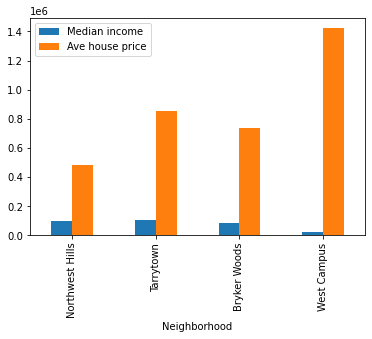

In [254]:
price_data.plot.bar(x='Neighborhood')

It can be seen that for Northwest, Tarrytown, and Bryker Woods,the average house prices are proportional with median house income. This is pretty normal.For West campus,most houses are for renting to students at university, which explains why the median income is low while house price is so high. While it's a good place for investment, the price is too high, plus it's not economic to live there ourselves. Let's consider it a good investment opportunity when we get richer. And with the same reason, Northwest Hills are most affordable for us! Lastly I checked the crime rate, it's also relatively safe compared to other neighborhoods near city center. That's our final target area--Northwest Hills!